### outlier Removal using Z score
*Data column must be normally distributed*

**Steps**
1. Check Distribution (Be surre if data is normally distributed)
2. Use Technique Trimming or Capping

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('placement.csv')


In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
713,7.80,24.0,0
921,6.91,38.0,1
265,6.94,57.0,0
37,8.51,9.0,1
598,7.59,27.0,1


In [4]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

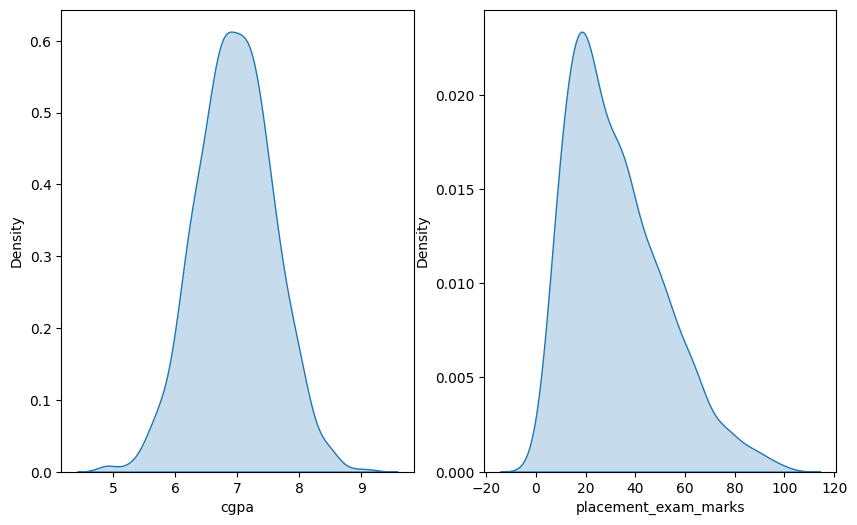

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'], fill=True)

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'], fill=True)

In [12]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [13]:
# Finding the boundary values
print('Highest Allowed', df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest Allowed', df['cgpa'].mean() - 3*df['cgpa'].std())

Highest Allowed 8.808933625397168
Lowest Allowed 5.113546374602832


In [14]:
# Finding the outliers
df[(df['cgpa']>8.8)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#### Trimming

In [15]:
new_df = df[(df['cgpa']<8.8) & (df['cgpa']>5.11)]
new_df.shape

(995, 3)

In [22]:
# Approach 2
#  Calculating Z-score

df['cgpa_score'] = (df['cgpa']- df['cgpa'].mean())/df['cgpa'].std()

In [23]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [25]:
df[df['cgpa_score'] <-3]

,cgpa,placement_exam_marks,placed,cgpa_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [26]:
new_df = df[(df['cgpa_score']<3) & (df['cgpa_score']>-3)]

In [27]:
new_df.shape

(995, 4)

#### Capping

In [28]:
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

In [30]:
upper_limit, lower_limit

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [29]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [31]:
df.shape

(1000, 4)

In [32]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64